In [30]:
from lut3d import *
import numpy as np
import cv2
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

In [41]:
lut = Lut3D()
optimizer = optim.Adam(lut.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
img = cv2.imread('./0003.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype(np.float32)
imgRaw = img/255.
img = np.expand_dims(imgRaw, 0)
img = torch.tensor(img)
img = torch.permute(img, (0,3,1,2))

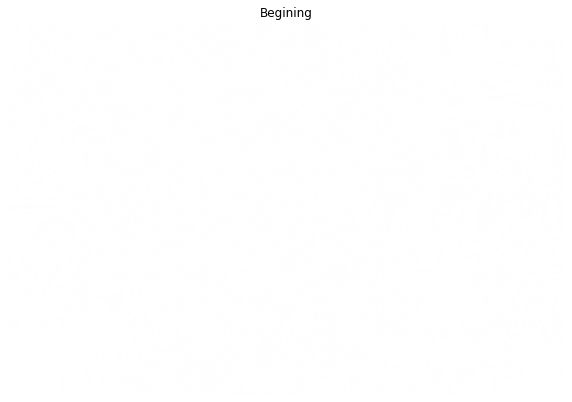

In [42]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("Begining")
    plt.show()

In [43]:
def lut_loss(lut):
    less = (lut[(lut < 0)]) ** 2
    upper = (lut[(lut > 1)] - 1) ** 2
    return less.sum() + upper.sum()
creition = torch.nn.L1Loss()

In [44]:
for i in range(1000):
    new_img = lut(img)
    loss = lut_loss(lut.LUT) + creition(new_img, img)
    if (i+1) % 100 == 0:
        print("Epoch: {}, loss: {:4f}".format(i+1, loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 100, loss: 0.453173
Epoch: 200, loss: 0.354745
Epoch: 300, loss: 0.260974
Epoch: 400, loss: 0.178591
Epoch: 500, loss: 0.112164
Epoch: 600, loss: 0.064460
Epoch: 700, loss: 0.030818
Epoch: 800, loss: 0.009833
Epoch: 900, loss: 0.001389
Epoch: 1000, loss: 0.000091


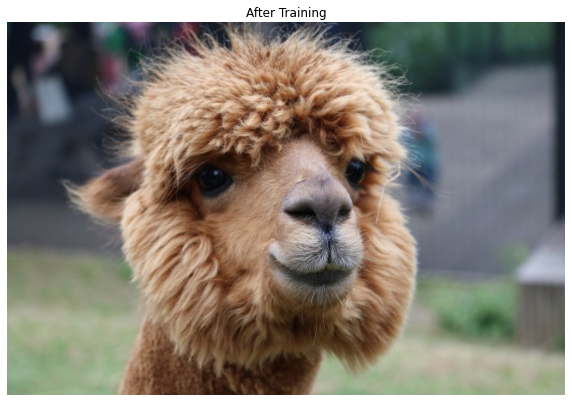

In [45]:
with torch.no_grad():
    new_img = lut(img)
    imgS = new_img.cpu().detach()
    imgS = torch.squeeze(imgS)
    imgS = torch.permute(imgS, (1,2,0)).numpy()
    imgS *= 255
    imgS = imgS.astype(np.uint8)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(imgS)
    plt.title("After Training")
    plt.show()